<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Correalationship" data-toc-modified-id="Correalationship-2">Correalationship</a></span></li><li><span><a href="#Bar-Plots" data-toc-modified-id="Bar-Plots-3">Bar Plots</a></span></li><li><span><a href="#Find-Maximum-or-Largest-Profit-Value-occuring-in-Dataset" data-toc-modified-id="Find-Maximum-or-Largest-Profit-Value-occuring-in-Dataset-4">Find Maximum or Largest Profit Value occuring in Dataset</a></span></li></ul></div>

In the previous notebook we understand the basic statistics and did the univariate analysis
on the dataset.
Now we explore the dataset in depth with different aspects.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('D:\\DataSets\\100000-Sales-Records\\100000 Sales Records.csv',thousands=',')

In [4]:
# it will Adjust all Charts to the center of the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26


In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Correalationship

**Scatter Plot** shows the correlation between the numeric variables and it also used when we have horizantal(x-axis) value and and what will be the value for predicted vertical
value(y-axis). It also shows the outlies in the data. 

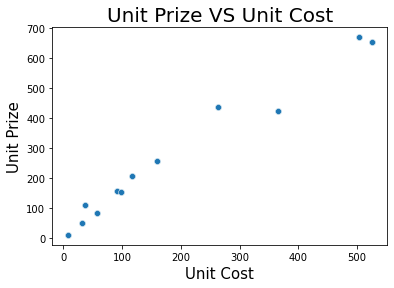

In [8]:
sns.scatterplot(x='Unit Cost',y='Unit Price',data=df)
plt.title('Unit Prize VS Unit Cost',size=20)
plt.xlabel('Unit Cost',size=15)
plt.ylabel('Unit Prize',size=15)
plt.show()

# The below Scatter plot shows the positive relation between the unit cost and unit prize.
# If the unit cost increase then the the Unit Prize also increase.

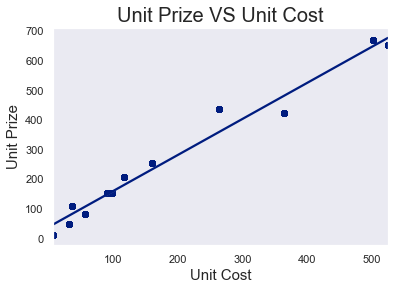

In [9]:
# we can also add the best fit line or regression line which shows more clear relationship
# between the variables.

sns.set_theme(context='notebook', style='dark', palette='dark', font='sans-serif')

sns.regplot(x='Unit Cost',y='Unit Price',data=df)
plt.title('Unit Prize VS Unit Cost',size=20)
plt.xlabel('Unit Cost',size=15)
plt.ylabel('Unit Prize',size=15)
plt.show()

# https://www.delftstack.com/howto/seaborn/background-color-seaborn/#:~:text=module%20in%20Python.-,Use%20the%20seaborn.,change%20background%20color%20in%20seaborn.

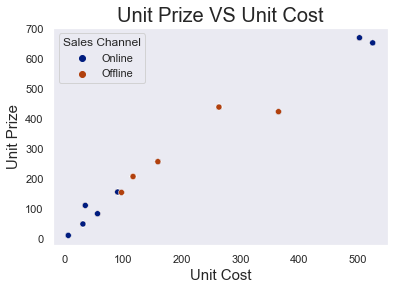

In [10]:
# We can also plot the scatter plot according to the third variables(Sales Channel).
sns.set_style("dark")

sns.scatterplot(x='Unit Cost',y='Unit Price',data=df,hue='Sales Channel')
plt.title('Unit Prize VS Unit Cost',size=20)
plt.xlabel('Unit Cost',size=15)
plt.ylabel('Unit Prize',size=15)
plt.show()
# At the low cost or prize tend to use online and at the mid range prizes tend to use offline.
# But at the very high peak tend towards online (we can also say those are detect as outliers).

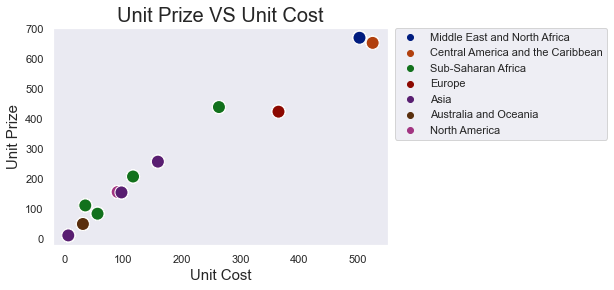

In [11]:
# plot scatter plot based on region
sns.scatterplot(x='Unit Cost',y='Unit Price',data=df,hue='Region',s = 170)
plt.title('Unit Prize VS Unit Cost',size=20)
plt.xlabel('Unit Cost',size=15)
plt.ylabel('Unit Prize',size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

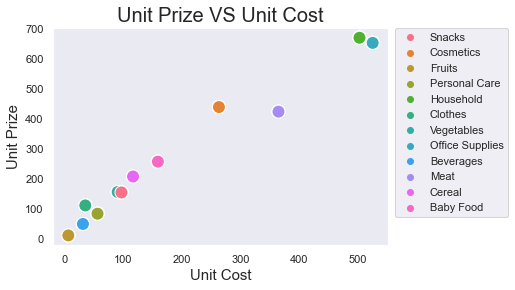

In [12]:
# plot scatter plot based on Item Type
sns.scatterplot(x='Unit Cost',y='Unit Price',data=df,hue='Item Type',s = 170)
plt.title('Unit Prize VS Unit Cost',size=20)
plt.xlabel('Unit Cost',size=15)
plt.ylabel('Unit Prize',size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

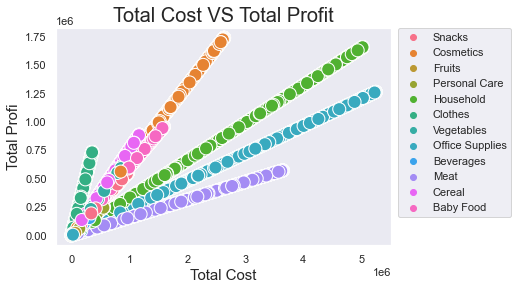

In [13]:
# plot scatter plot between ''Total Cost' and 'Total Profit' based on 'Item Type'
sns.scatterplot(x='Total Cost',y='Total Profit',data=df,hue='Item Type',s = 170)
plt.title('Total Cost VS Total Profit',size=20)
plt.xlabel('Total Cost',size=15)
plt.ylabel('Total Profi',size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
# Thee is also a positive relationship which is expected.
# And Snacks items have the large total cost and Cosmetics havs comparitively less total cost 
# but higher the total profit.

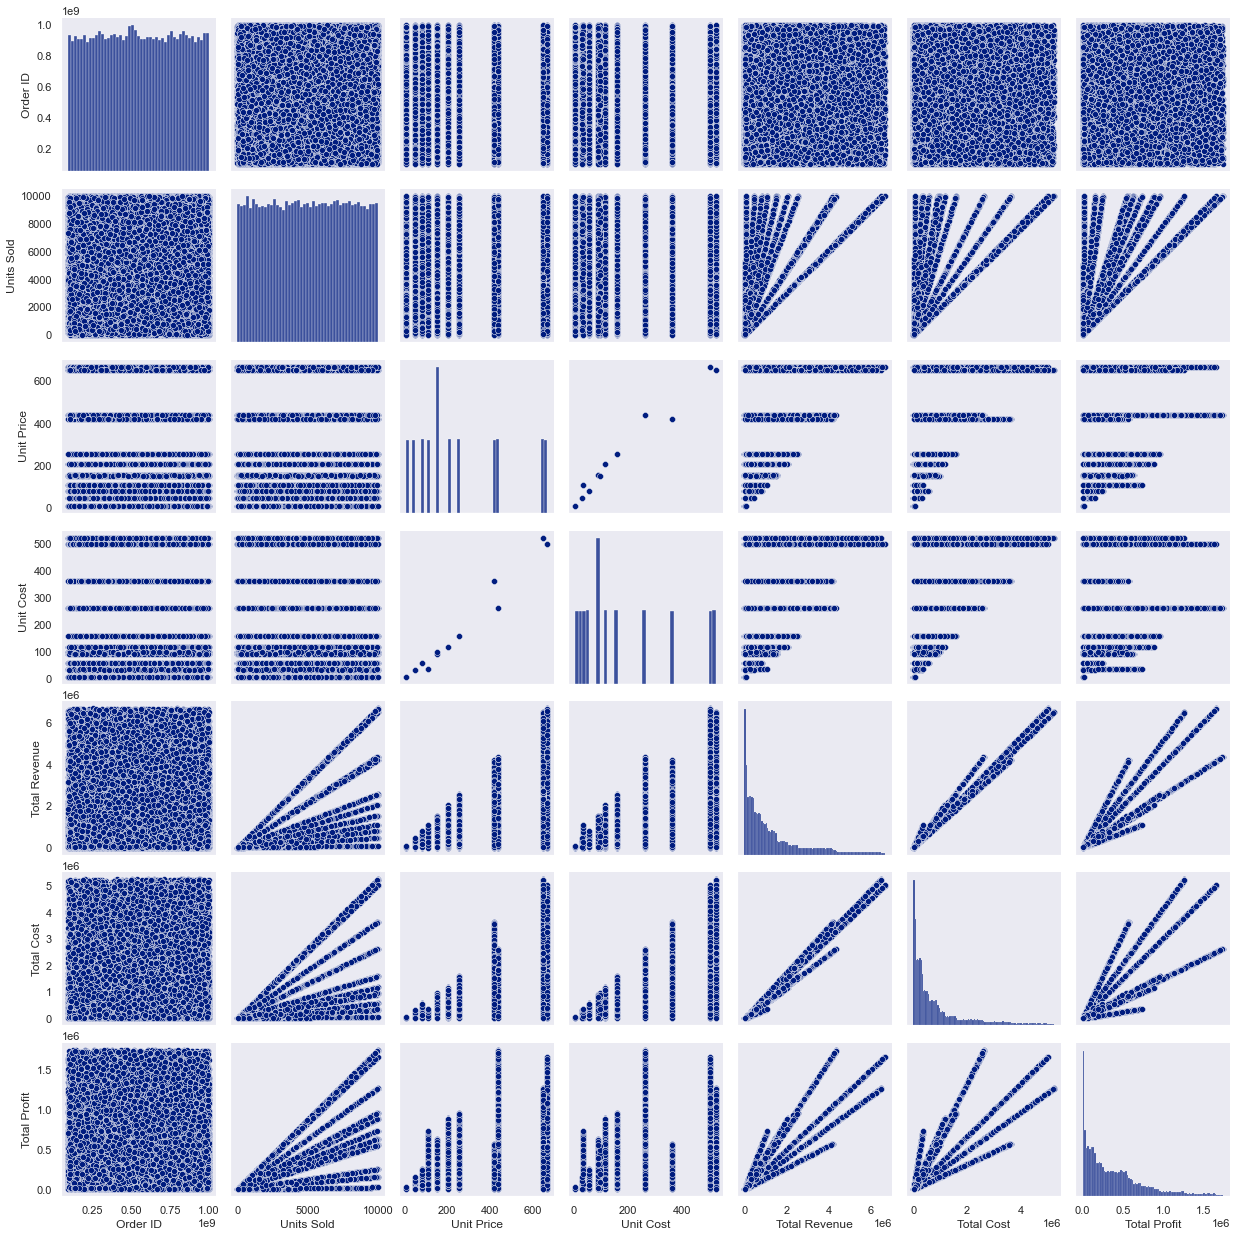

In [40]:
sns.pairplot(df);

### Bar Plots

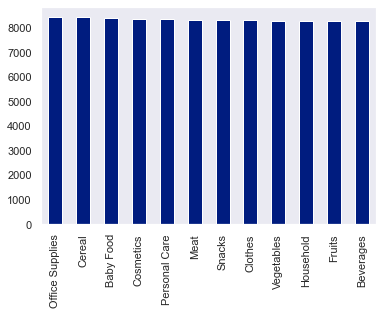

In [14]:
df['Item Type'].value_counts().plot(kind='bar');
# So, there is no too much difference of 'Item Type' occur int he dataset or there is no too
# much difference between the 'Item Type' they order

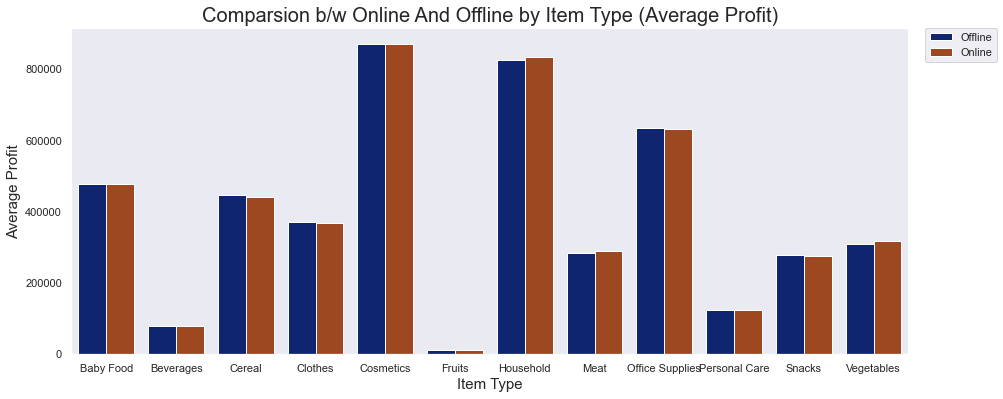

In [23]:
plt.figure(figsize=(15,6)) 

# perform groupby
df1 = df.groupby(['Item Type', 'Sales Channel']).agg(total_profit=("Total Profit", 'mean'))
df1 = df1.reset_index()
  
# plot barplot
sns.barplot(x="Item Type",
           y="total_profit",
           hue="Sales Channel",
           data=df1)
plt.title('Comparsion b/w Online And Offline by Item Type (Average Profit)',size=20)
plt.xlabel('Item Type',size=15)
plt.ylabel('Average Profit',size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
# In Each 'Item Type' there is very little difference between Online and Offline but Profit vary
# form different 'Item Type'

lets check the online and offline profit in different counteries

In [17]:
data=df['Country'].value_counts().sort_values(ascending=False) # select top 3 and last 3 countries
data

Sudan           623
New Zealand     593
Vatican City    590
Mozambique      589
Malta           589
               ... 
Switzerland     504
Ghana           500
Nigeria         499
Jamaica         494
Angola          489
Name: Country, Length: 185, dtype: int64

In [36]:
df1=df[(df['Country']=='Sudan') | (df['Country']=='New Zealand') | (df['Country']=='Vatican City') 
       | (df['Country']=='Nigeria') | (df['Country']=='Jamaica') | (df['Country']=='Angola')]


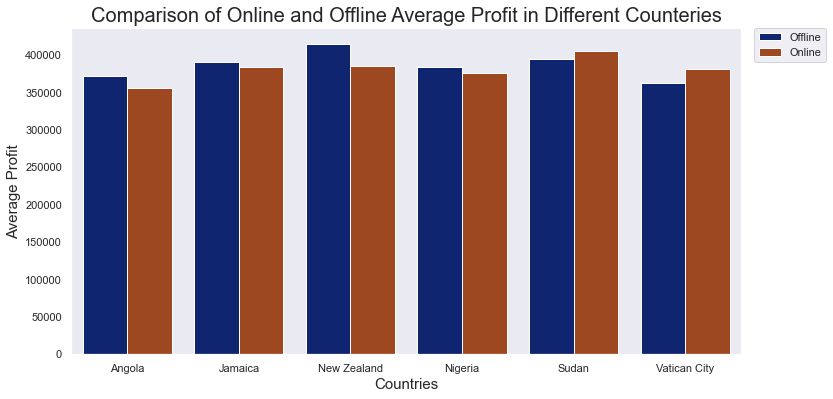

In [38]:
plt.figure(figsize=(12,6)) 

# perform groupby
df2 = df1.groupby(['Country', 'Sales Channel']).agg(total_profit=("Total Profit", 'mean'))
df2 = df2.reset_index()
df2
# plot barplot
sns.barplot(x="Country",
           y="total_profit",
           hue="Sales Channel",
           data=df2)
plt.title('Comparison of Online and Offline Average Profit in Different Counteries',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Average Profit',size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

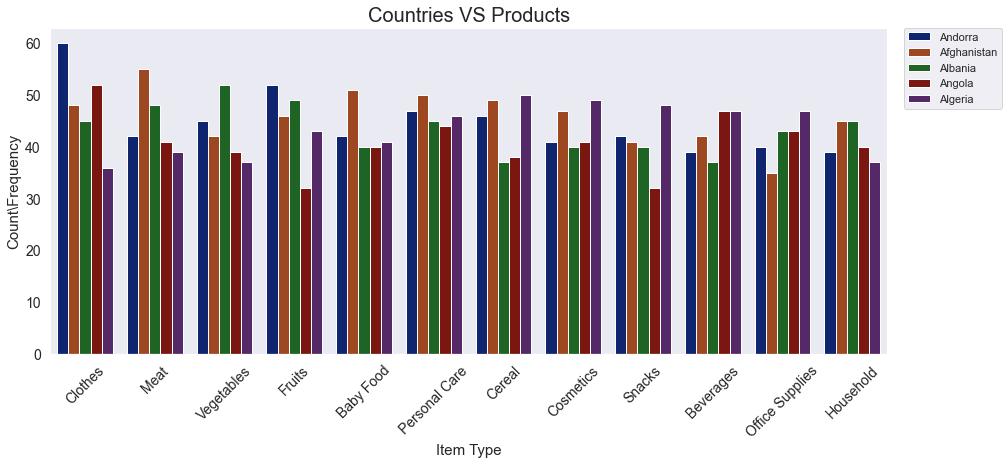

In [154]:
plt.figure(figsize=(15,6)) 
data3=df.groupby('Country')['Item Type'].value_counts()
data3=pd.DataFrame(data3)
data3=data3.rename(columns={'Item Type':'Frequency'})
pd.set_option("max_rows", None)
data3=data3[0:60].reset_index() # select top 5 countries
data3=data3.reset_index().sort_values(['Frequency'],ascending=False)

sns.barplot(x="Item Type",
           y="Frequency",
           hue="Country",
           data=data3)
plt.title('Countries VS Products',size=20)
plt.xlabel('Item Type',size=15)
plt.ylabel('Count\Frequency',size=15)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Find Maximum or Largest Profit Value occuring in Dataset 
In python you can do one particular task in different ways (More then one).
Finding top n values in dataset is one of them.

In [148]:
# using nlargest method
data=df[['Country','Total Profit']]
data.nlargest(10,'Total Profit')

,Country,Total Profit
27108,Comoros,1738700.00
20982,Oman,1738178.39
85007,Kazakhstan,1738004.52
2693,Panama,1737656.78
18736,Tonga,1737656.78
81441,Mozambique,1737656.78
76211,El Salvador,1737482.91
44522,The Gambia,1737309.04
12517,Equatorial Guinea,1737135.17
27140,Bahrain,1737135.17


In [149]:
# using sort_values() method
data.sort_values('Total Profit', ascending=False).head(10)

,Country,Total Profit
27108,Comoros,1738700.00
20982,Oman,1738178.39
85007,Kazakhstan,1738004.52
18736,Tonga,1737656.78
2693,Panama,1737656.78
81441,Mozambique,1737656.78
76211,El Salvador,1737482.91
44522,The Gambia,1737309.04
12517,Equatorial Guinea,1737135.17
27140,Bahrain,1737135.17
